In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [3]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [4]:
df = pd.read_csv('dogecoin_clean.csv')

In [5]:
df = df.astype(str)

In [6]:
df[:10]

,date,tweet
0,2019-12-31,Everyone talks about what Doge can be but no o...
1,2019-12-31,D67JNZcsoPVpB8rDgLXjrV8d8kidanLqa6 #crypto #ai...
2,2019-12-31,Want to win 50000 DOGECOINS Free? Register wit...
3,2019-12-31,"Too little, too late. To compensate for the pr..."
4,2019-12-31,"Compared to Bitcoin, yes. Compared to anything..."
5,2019-12-31,Question! When we speak of the moon are we tal...
6,2019-12-31,Here is the BTC forecast for 2020 via /r/dogec...
7,2019-12-31,Dogecoin via /r/dogecoin hot fire in #reddit #...
8,2019-12-31,Newbie needs help getting started as 2020 loom...
9,2019-12-31,Cryptocurrency online casino-FORTUNEJACK One o...


In [7]:
all_dates = list(df["date"])
tweets = list(df["tweet"])

Text(0, 0.5, 'Frequency')

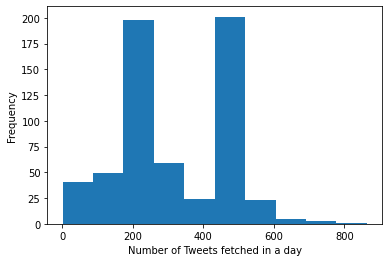

In [8]:
# Fig 1: Frequency is on y-axis, tweets on that day is on x-axis. 500 is most common, but so is 200. 
df["date"].value_counts().plot.hist()
plt.xlabel("Number of Tweets fetched in a day")
plt.ylabel("Frequency")


([], [])

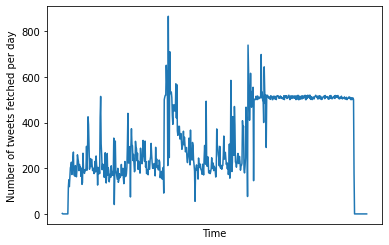

In [9]:
df["date"].value_counts().sort_index().plot.line()
plt.ylabel("Number of tweets fetched per day")
plt.xlabel("Time")
plt.xticks([])

In [24]:
# total tweets
len(df["tweet"])

196547

In [27]:
stopwords = set(STOPWORDS)

In [32]:
freq = Counter()
for entry in tweets:
    words = entry.split()
    for word in words:
        if word not in stopwords:
            freq[word]+=1
freq.most_common(10)

[('#dogecoin', 74882),
 ('Dogecoin', 30891),
 ('#doge', 27427),
 ('I', 25149),
 ('face', 22745),
 ('rocket', 22550),
 ('#Dogecoin', 20768),
 ('dogecoin', 17187),
 ('DOGE', 16029),
 ('#bitcoin', 15711)]

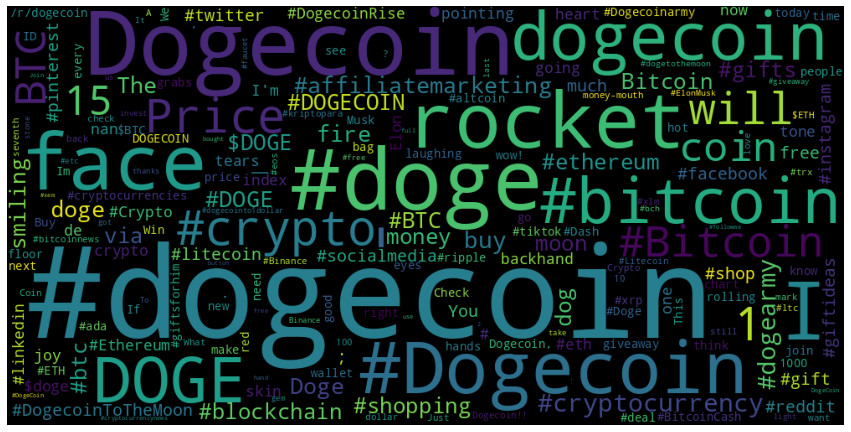

In [33]:
# Fig 2 Wordcloud

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(freq)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [49]:
pos_freq = Counter()
for i,entry in enumerate(tweets):
    if i%10000==0:
        print(i)
    words = word_tokenize(entry)
    pos_tag_pairs = pos_tag(words)
    pos_tags = [i[1] for i in pos_tag_pairs]
    for word in pos_tags:
        if word not in stopwords:
            pos_freq[word]+=1
pos_freq.most_common(10)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000


[('NN', 656775),
 ('#', 635395),
 ('NNP', 627996),
 ('JJ', 333283),
 ('IN', 215612),
 ('.', 168154),
 ('RB', 147093),
 ('DT', 142335),
 ('CD', 141233),
 ('VB', 125025)]

In [52]:
pos_freq_pairs = pos_freq.most_common(10)

In [53]:
pos_freq_dic = {}
for i in pos_freq_pairs:
    pos_freq_dic[i[0]] = i[1]

<BarContainer object of 10 artists>

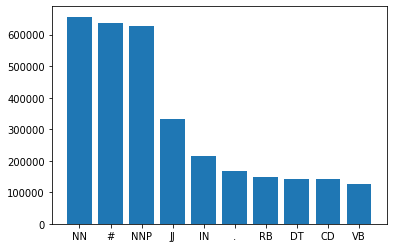

In [54]:
# Figure 3, POS Tag frequency

plt.bar(pos_freq_dic.keys(), pos_freq_dic.values())